## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
# import libraries uisng aliases
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

 Read in the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

 Examine the first 5 rows and the last 5 rows of the of the dataframe using head() and tail() methods

In [4]:
print(df.head())
print(df.tail())

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    164
3  2008-08-01 00:00:00           c     83
4  2008-08-01 00:00:00      python    122
                     DATE     TAG  POSTS
2239  2022-01-01 00:00:00       r   4457
2240  2022-01-01 00:00:00      go    892
2241  2022-01-01 00:00:00  python  25098
2242  2022-01-01 00:00:00    ruby    501
2243  2022-01-01 00:00:00   swift   2195


Check how many rows and how many columns there are. 
What are the dimensions of the dataframe? We can tell this from the shape of the data

In [5]:
df.shape

(2244, 3)

 Count the number of entries in each column of the dataframe using the count() method

In [6]:
df.count()

DATE     2244
TAG      2244
POSTS    2244
dtype: int64

Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time? Let's sum these posts per language and order them descendings

In [39]:
df.groupby('TAG').sum().sort_values(by='POSTS', ascending=False)

,POSTS
TAG,
javascript,2327495
python,1878303
java,1823556
c#,1519267
php,1426304
c++,752556
r,434505
c,373197
swift,308232


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Which language had the fewest months with an entry? 


In [41]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,162,162
c,162,162
c#,163,163
c++,162,162
delphi,162,162
go,147,147
java,162,162
javascript,162,162
perl,162,162


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [44]:
df['DATE'] = pd.to_datetime(df.DATE)

In [47]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,164
3,2008-08-01,c,83
4,2008-08-01,python,122


## Data Manipulation: Pivoting DataFrames



Sometimes you want to convert your DataFrame so that each category has its own column.
We use the .pivot() method. The index are the categories for the rows. The columns are the categories for the columns. And the values are what you want in the new cells.

In [48]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [49]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,164.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN


What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [50]:
reshaped_df.shape


(163, 14)

In [51]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [52]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2021-09-01,197.0,1802.0,5761.0,3916.0,143.0,659.0,7798.0,16682.0,114.0,4317.0,21942.0,4328.0,507.0,1936.0
2021-10-01,223.0,2207.0,6044.0,4090.0,150.0,761.0,7800.0,16239.0,131.0,4291.0,22991.0,4749.0,480.0,1852.0
2021-11-01,312.0,2346.0,6419.0,4185.0,151.0,710.0,8319.0,15892.0,81.0,4151.0,23502.0,4640.0,449.0,1767.0
2021-12-01,289.0,2269.0,5769.0,3893.0,158.0,775.0,7597.0,15391.0,103.0,3776.0,22202.0,3934.0,437.0,1677.0
2022-01-01,272.0,2266.0,6584.0,4361.0,159.0,892.0,8684.0,18012.0,141.0,4905.0,25098.0,4457.0,501.0,2195.0


Count the number of entries per programming language. Why might the number of entries be different? 

In [53]:
reshaped_df.count()

TAG
assembly      162
c             162
c#            163
c++           162
delphi        162
go            147
java          162
javascript    162
perl          162
php           162
python        162
r             160
ruby          162
swift         154
dtype: int64

When we count the number of entries per column we see that not all languages are the same. The reason is that the .count() method excludes NaN values. When we pivoted the DataFrame the NaN values were inserted when there were no posts for a language in that month (e.g., Swift in July, 2008).

### Dealing with Missing Values

In this case, we don't want to drop the rows that have a NaN value. Instead, we want to substitute the number 0 for each NaN value in the DataFrame. We can do this with the .fillna() method.

In [54]:
reshaped_df.fillna(0, inplace=True)

In [56]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,163.0,14.0,0.0,222.0,164.0,28.0,160.0,122.0,0.0,71.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,502.0,452.0,1.0,159.0,0.0


We can also check if there are any NaN values left in the entire DataFrame with this line:

In [57]:
reshaped_df.isna().values.any()

False

Here we are using the .isna() method that we've used before, but we're chaining two more things: the values attribute and the any() method. This means we don't have to search through the entire DataFrame to spot if .isna() is True.

## Data Visualisaton with with Matplotlib


Plot a single programming language (e.g., java) on a chart.

Text(0.5, 1.0, 'Java Popularity on StackOverflow')

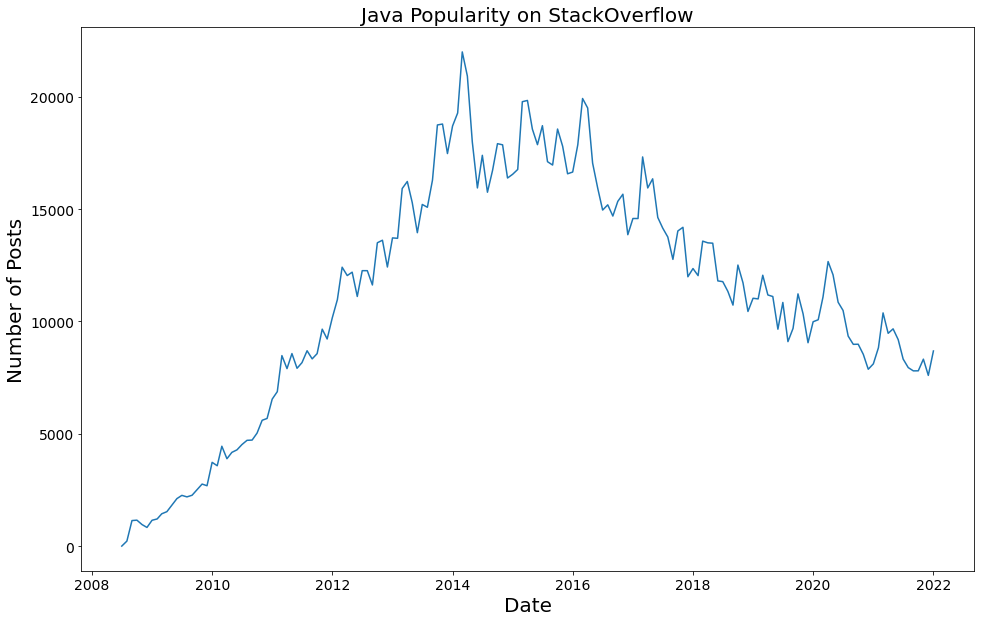

In [71]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.ylabel('Number of Posts', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title('Java Popularity on StackOverflow', fontsize=20)
# plt.ylim(0,35000)
# plt.xlim(2008,2022)
# plt.plot(reshaped_df.index, reshaped_df['java']) an alternative

Text(0.5, 1.0, 'Java Popularity on StackOverflow')

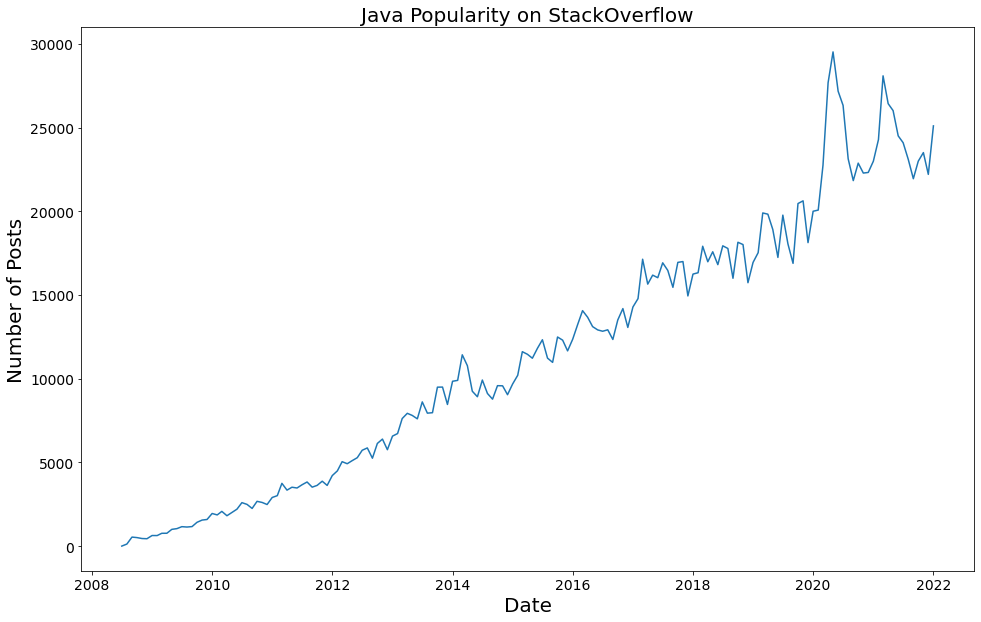

In [72]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.python)
plt.ylabel('Number of Posts', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title('Java Popularity on StackOverflow', fontsize=20)

Text(0.5, 1.0, 'Java Popularity on StackOverflow')

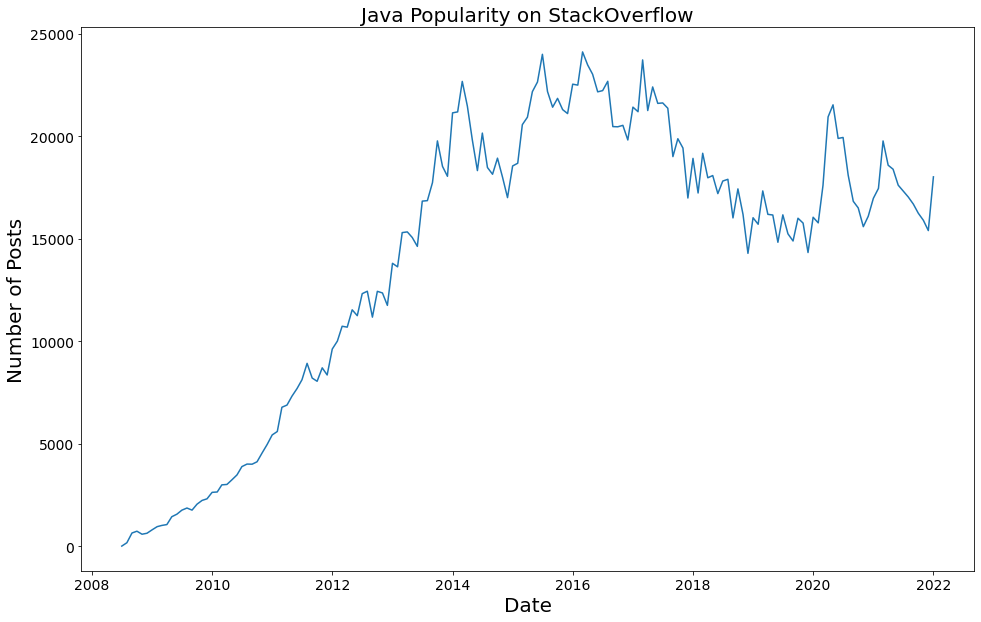

In [73]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.javascript)
plt.ylabel('Number of Posts', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title('Java Popularity on StackOverflow', fontsize=20)

Show two line (e.g. for Java and Python) on the same chart.

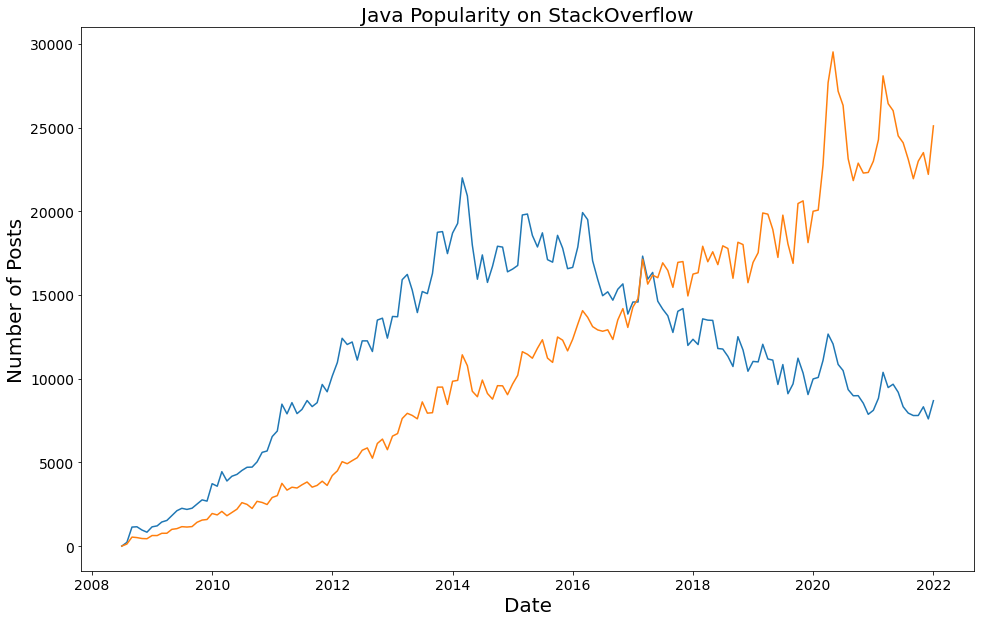

In [76]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number of Posts', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.title('Java Popularity on StackOverflow', fontsize=20)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

The trick is simply calling the .plot() method twice. That's all there is to it!

But what if we wanted to plot all the programming languages on the same chart? We don't want to type out .plot() a million times, right? We can actually just use a for-loop:

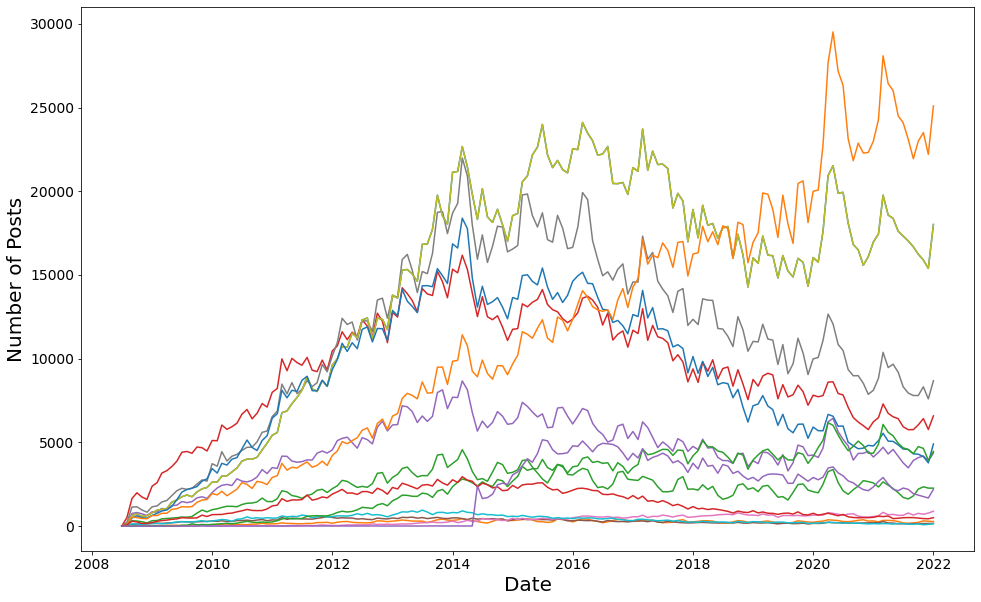

In [88]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.javascript)
plt.ylabel('Number of Posts', fontsize=20)
plt.xlabel('Date', fontsize=20)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

But wait, which language is which? It's really hard to make out without a legend that tells us which colour corresponds to each language. Let's modify the plotting code to add a label for each line based on the column name (and make the lines thicker at the same time using linewidth). Then let's add a legend to our chart...

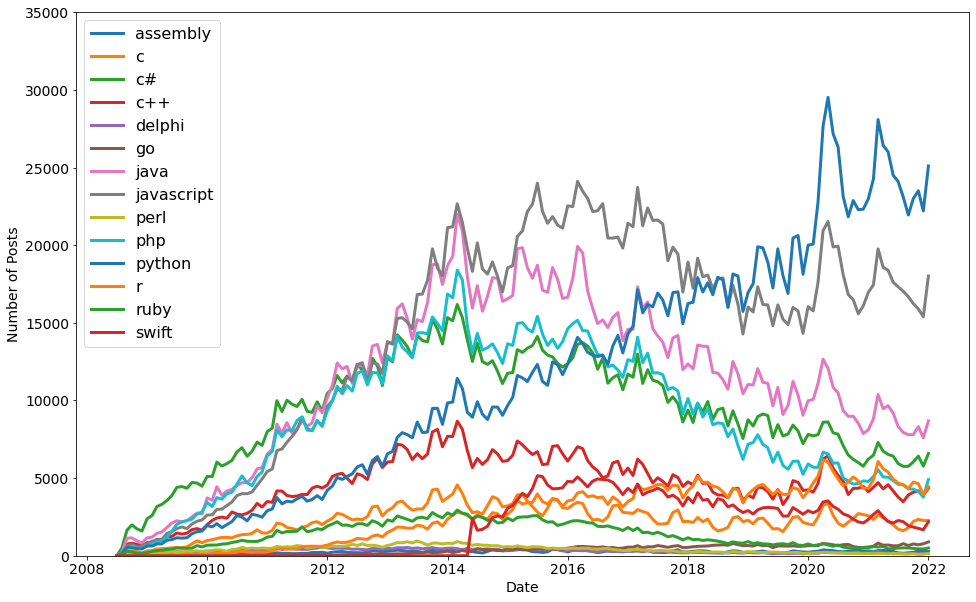

In [89]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=16) 

Looks like Python is the most popular programming language judging by the number of posts on Stack Overflow! Python for the win! =) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

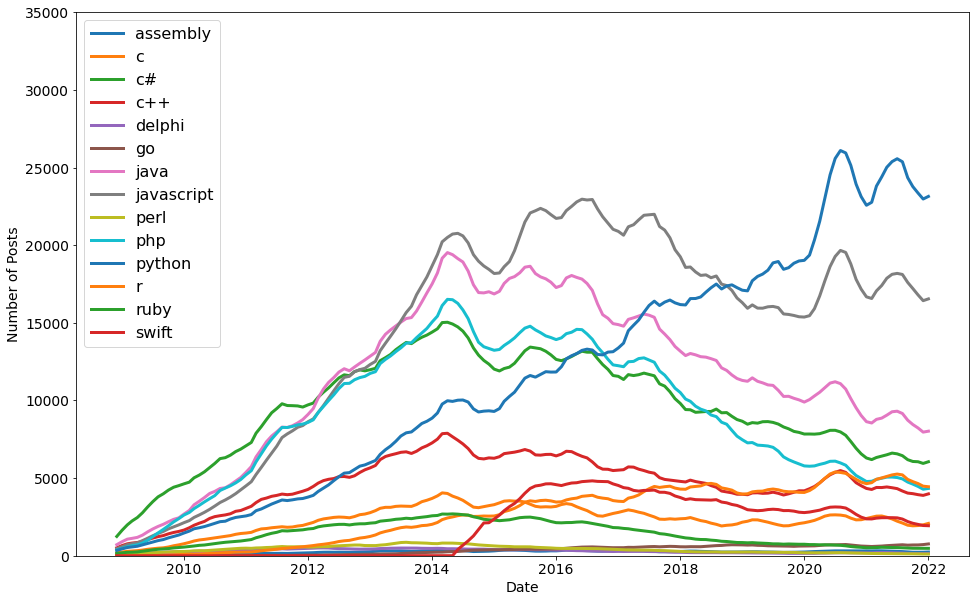

In [92]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

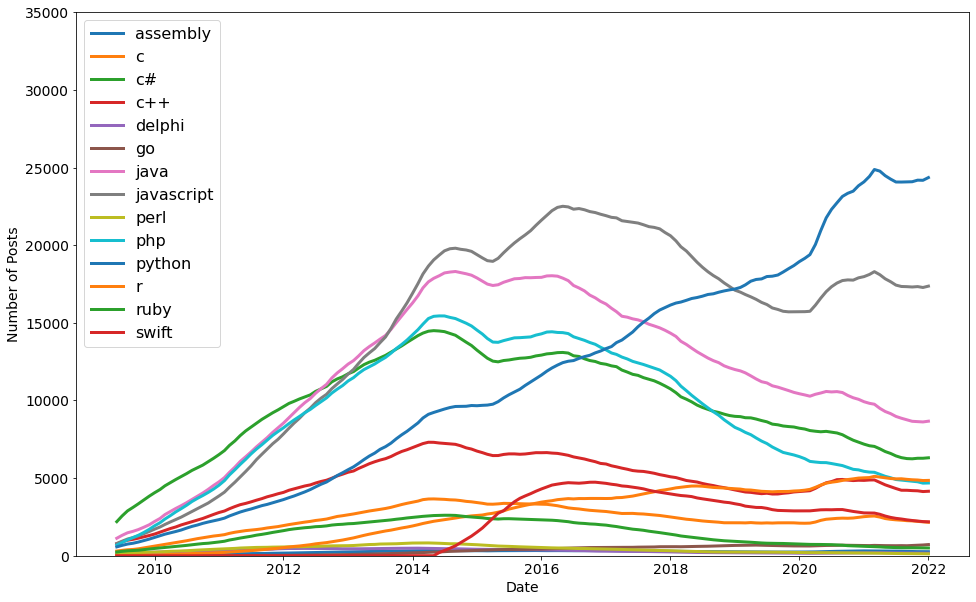

In [101]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=12).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

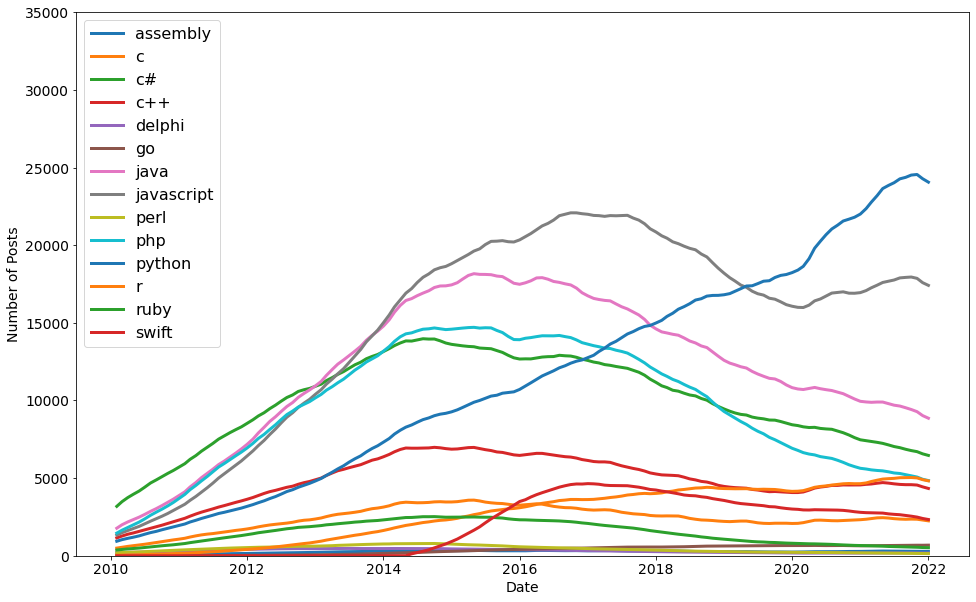

In [102]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=20).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

That is it!!